# Symbolic computation in Python with SymPy

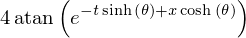

In [4]:
from sympy import *
init_printing(use_latex=True)

x, t, theta = symbols('x t theta', real=True)
z = cosh(theta)*x - sinh(theta)*t
u = 4*atan(exp(z))
u

### Check that $u$ solves the sine-Gordon equation $u_{tt} - u_{xx} + \sin(u) = 0$

In [2]:
sg = diff(u,t,2) - diff(u,x,2) + sin(u)
simplify(sg)

### The soliton solutions interpolate between multiples of $2\pi$

In [5]:
limit(u,x,-oo)

In [4]:
limit(u,x,oo)

### Compute the energy of a soliton $E=\frac{1}{2}u_t^2 + \frac{1}{2}u_x^2 + 1 - \cos(u)$

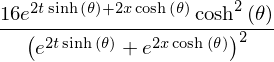

In [5]:
ux = simplify(diff(u,x))
ut = simplify(diff(u,t))
dE = simplify((ut**2+ux**2)/2 + 1 - cos(u))
dE

In [6]:
simplify(integrate(dE, (x,-oo, oo)))

### Plot the derivative $u_x(x,t)$

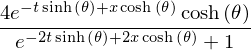

In [7]:
ux = simplify(diff(u,x))
ux

In [8]:
uxFunc = lambdify((x,t,theta), ux, 'numpy')     # Turn a symbolic function into a Python function

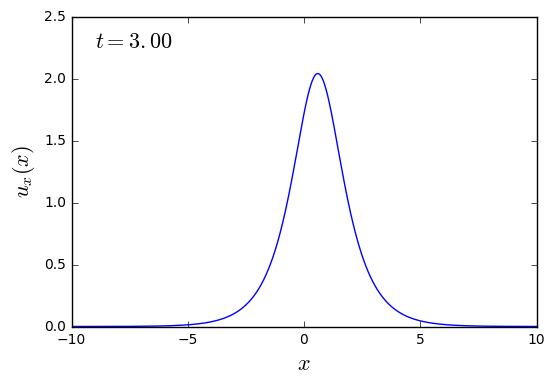

In [9]:
import numpy as np
import matplotlib.pyplot as plt

xArray  = np.linspace(-10,10,1001)
tVal  = 3
thVal = 0.2

plt.plot(xArray,uxFunc(xArray,tVal,thVal))
plt.xlabel('$x$', size=16)
plt.ylabel('$u_x(x)$', size=16)

axis = plt.gca()
plt.text(0.05, 0.9, '$t= %.2f$' % tVal, transform=axis.transAxes, size=16)

plt.show()

### Sympy is...
* Lightweight (only requires Python)
* Very extendable through Python
* Free
* Probably not replacing Mathematica or Maple quite yet?